In [7]:
import pandas as pd
import numpy as np


In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00437/Residential-Building-Data-Set.xlsx'
data = pd.read_excel(url, header=1, sheet_name=0)


In [9]:
data.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [10]:
data.shape


(372, 109)

In [11]:
cols = pd.read_excel(url, sheet_name=1)
cols.head(10)


,Variable Group,Variable ID,Descriptions,Unit,Time Lag Number p
0,PROJECT PHYSICAL AND FINANCIAL VARIABLES,V-1,Project locality defined in terms of zip codes,NaN,NaN
1,NaN,V-2,Total floor area of the building,m2,NaN
2,NaN,V-3,Lot area,m2,NaN
3,NaN,V-4,Total preliminary estimated construction cost ...,10000000 IRRm,NaN
4,NaN,V-5,Preliminary estimated construction cost based ...,10000 IRRm,NaN
5,NaN,V-6,Equivalent preliminary estimated construction ...,10000 IRRm,NaN
6,NaN,V-7,Duration of construction,As a number of time resolution e,NaN
7,NaN,V-8,Price of the unit at the beginning of the proj...,10000 IRRm,NaN
8,NaN,V-9,Actual sales prices (output),10000 IRRm,NaN
9,NaN,V-10,Actual construction costs (output),10000 IRRm,NaN


In [12]:
y = data['V-9']
x = data.drop(['V-9','V-10'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [21]:
Xtrain, Xval, ytrain, yval = train_test_split(
    x, y, train_size=0.5, random_state=0)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape


((186, 107), (186, 107), (186,), (186,))

In [26]:
# faz a correlação das features com alvo na target
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

k_vs_score = []

# selecionando grupos de variaveis. é melhor do que testar as variaveis individualmente
for k in range(2,108,2):
 
    selector = SelectKBest(score_func=f_regression, k=k)

    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xval2 = selector.transform(Xval)

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=0)
    mdl.fit(Xtrain2, ytrain)

    p = mdl.predict(Xval2)

    score = mean_absolute_error(yval, p)
    print('K = {} - MAE = {}'.format(k, score))

    k_vs_score.append(score)


K = 2 - MAE = 121.7203680235535
K = 4 - MAE = 108.06066308243727
K = 6 - MAE = 107.48879928315411
K = 8 - MAE = 107.65448028673835
K = 10 - MAE = 107.13745519713261
K = 12 - MAE = 106.9988799283154
K = 14 - MAE = 106.52589605734767
K = 16 - MAE = 106.69937275985664
K = 18 - MAE = 107.39807347670249
K = 20 - MAE = 107.26173835125446
K = 22 - MAE = 106.40784050179212
K = 24 - MAE = 105.7695340501792
K = 26 - MAE = 106.25439068100358
K = 28 - MAE = 105.12607526881719
K = 30 - MAE = 104.52629928315412
K = 32 - MAE = 107.59139784946237
K = 34 - MAE = 108.55107526881719
K = 36 - MAE = 107.91451612903225
K = 38 - MAE = 107.00618279569893
K = 40 - MAE = 106.852688172043
K = 42 - MAE = 107.5733870967742
K = 44 - MAE = 107.53118279569894
K = 46 - MAE = 107.5989247311828
K = 48 - MAE = 106.8991935483871
K = 50 - MAE = 107.45591397849462
K = 52 - MAE = 107.86155913978494
K = 54 - MAE = 106.38844086021506
K = 56 - MAE = 107.36075268817206
K = 58 - MAE = 108.77123655913977
K = 60 - MAE = 109.4424731

<AxesSubplot:>

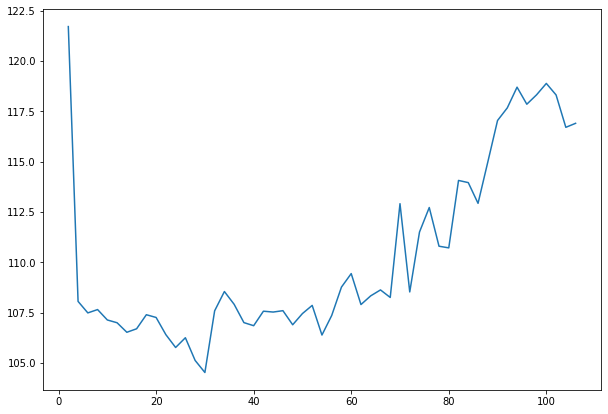

In [27]:
# levar a forma da curva toda, a olhar para aquelas curvas que não possuem picos. 
# nesse exemplo 20 e 40 seria ideial.
pd.Series(k_vs_score, index=range(2,108,2)).plot(figsize=(10,7))

In [28]:
selector = SelectKBest(score_func=f_regression, k=30)

selector.fit(Xtrain, ytrain)


SelectKBest(k=30, score_func=<function f_regression at 0x000001A7B289E700>)

In [30]:
mask = selector.get_support()

In [31]:
Xval.iloc[:,mask]


,START YEAR,COMPLETION YEAR,V-5,V-8,V-15,V-21,V-25,V-26,V-15.1,V-21.1,...,V-22.3,V-25.3,V-26.3,V-29.3,V-12.4,V-13.4,V-21.4,V-25.4,V-26.4,V-29.4
141,75,76,40,470,85072.2,225.7,27.84,18.37,73530.1,277.8,...,347.50,23.28,15.27,519679.8,17.4,20.75,210.1,19.49,14.20,410490.1
142,77,78,90,810,134548.4,574.6,41.03,33.37,134312.5,589.5,...,667.80,35.67,28.87,390388.5,33.4,36.56,229.2,34.98,27.13,408321.5
274,76,77,10,180,116552.6,763.2,32.83,25.62,98042.9,412.0,...,467.10,29.95,19.70,420359.6,24.3,26.87,225.7,27.84,18.37,420700.5
60,87,88,360,3400,1622664.0,2871.3,171.13,178.30,1640293.0,2738.8,...,2627.50,140.90,146.20,1681849.3,160.0,141.34,2451.2,136.56,138.80,1732937.5
303,84,85,160,830,784948.5,1534.6,109.02,112.00,704586.3,1836.6,...,1584.30,101.00,101.89,1067772.0,98.2,98.64,1298.8,98.12,98.45,973523.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,78,79,100,550,166267.2,641.5,49.92,40.26,160401.5,614.0,...,663.97,41.79,34.76,409677.9,38.0,39.43,574.6,41.03,33.37,403875.0
281,81,83,90,340,365186.2,886.4,73.57,69.26,339325.9,831.8,...,861.80,65.00,60.53,610502.7,54.2,59.40,795.0,63.69,58.55,589389.6
366,80,82,50,350,262789.0,746.8,62.78,56.45,249110.7,733.8,...,717.90,56.99,48.40,605688.7,47.8,57.88,645.9,56.37,46.45,626960.3
230,75,77,70,140,98042.9,412.0,31.30,23.87,92354.2,431.1,...,409.30,27.84,18.37,420700.5,23.1,25.34,277.8,25.69,17.34,405541.8


In [33]:
# as variaveis utilizadas
Xval.columns[mask]

Index(['START YEAR', 'COMPLETION YEAR', 'V-5', 'V-8', 'V-15', 'V-21', 'V-25',
       'V-26', 'V-15.1', 'V-21.1', 'V-25.1', 'V-26.1', 'V-13.2', 'V-21.2',
       'V-25.2', 'V-26.2', 'V-29.2', 'V-12.3', 'V-13.3', 'V-21.3', 'V-22.3',
       'V-25.3', 'V-26.3', 'V-29.3', 'V-12.4', 'V-13.4', 'V-21.4', 'V-25.4',
       'V-26.4', 'V-29.4'],
      dtype='object')

<AxesSubplot:>

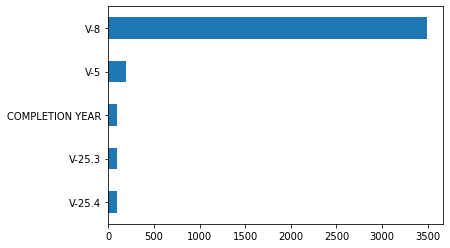

In [38]:
# scores = onde é armazenado os valores de f_regression
# quanto maior, maior a relação
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail().plot.barh()

In [ ]:
# tunar primeiro os hiperparametros depois fazer a seleção